In [30]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [31]:
loc1 = 'brain_tumor_dataset/no/'
loc2 = 'brain_tumor_dataset/yes/'

In [32]:
import os

features = []

for img in os.listdir(loc1):
    im = cv2.imread(os.path.join(loc1,img))
    im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, (100,100))
    features.append(im)
    
for img in os.listdir(loc2):
    im = cv2.imread(os.path.join(loc2,img))
    im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, (100,100))
    features.append(im)

In [33]:
features = np.array(features)
print(features.shape)

(253, 100, 100)


In [34]:
labels = []

for img in os.listdir(loc1):
    labels.append(0)
    
for img in os.listdir(loc2):
    labels.append(1)

In [35]:
labels = np.array(labels)
print(labels.shape)

(253,)


In [36]:
X = features.reshape(253,10000)
Y = labels.reshape(253,1)

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [15]:
xtrainS = xtrain/255
xtestS = xtest/255

In [16]:
from keras import models,layers,optimizers

model = models.Sequential()

model.add(layers.Dense(200 ,  activation = 'relu' , input_dim = 10000))

model.add(layers.Dense(200 , activation = 'relu'))
model.add(layers.Dense(100 , activation = 'relu'))
model.add(layers.Dense(100 , activation = 'relu'))

model.add(layers.Dense(1 , activation = 'sigmoid'))

In [17]:
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(0.001)
model.compile(loss='binary_crossentropy' , optimizer=sgd , metrics=['accuracy'])

In [18]:
model.fit(xtrainS,ytrain,
         epochs=200,
         validation_data=(xtestS,ytest))

Epoch 1/200
6/6 [==============================] - 1s 65ms/step - loss: 0.6930 - accuracy: 0.5079 - val_loss: 0.6853 - val_accuracy: 0.6094
Epoch 2/200
6/6 [==============================] - 0s 27ms/step - loss: 0.6832 - accuracy: 0.6349 - val_loss: 0.6750 - val_accuracy: 0.6562
Epoch 3/200
6/6 [==============================] - 0s 25ms/step - loss: 0.6746 - accuracy: 0.6667 - val_loss: 0.6655 - val_accuracy: 0.6875
Epoch 4/200
6/6 [==============================] - 0s 24ms/step - loss: 0.6670 - accuracy: 0.6772 - val_loss: 0.6571 - val_accuracy: 0.6875
Epoch 5/200
6/6 [==============================] - 0s 25ms/step - loss: 0.6606 - accuracy: 0.6667 - val_loss: 0.6498 - val_accuracy: 0.6719
Epoch 6/200
6/6 [==============================] - 0s 26ms/step - loss: 0.6551 - accuracy: 0.6561 - val_loss: 0.6433 - val_accuracy: 0.7031
Epoch 7/200
6/6 [==============================] - 0s 25ms/step - loss: 0.6503 - accuracy: 0.6561 - val_loss: 0.6373 - val_accuracy: 0.6875
Epoch 8/200
6/6 [===

In [19]:
user_input=xtest[3].reshape(1,10000)
print(np.round(model.predict(user_input)))

1/1 [==============================] - 0s 215ms/step
[[1.]]


Actual Label [1]


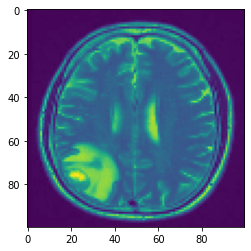

In [22]:
print('Actual Label' , ytest[3])
plt.imshow(xtest[3].reshape(100,100))
plt.show()

In [27]:
model.save("Brain_tumor_Detection.h5")

In [28]:
from keras import models    
loaded_model = models.load_model("Brain_tumor_Detection.h5")    

In [29]:
loaded_model.predict(user_input)

1/1 [==============================] - 0s 112ms/step


array([[1.]], dtype=float32)